In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('auto_imports.csv')

In [3]:
#pd.set_option('dispaly.max_columns',None)
pd.set_option('display.max_columns',None)

In [4]:
data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
data.columns=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style',
              'drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders',
              'engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']


In [6]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [7]:
#Basic Checks and EDA
data.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
199,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [8]:
data.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [9]:
data.describe(include='O')

,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,bore,stroke,horsepower,peak_rpm
count,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500
freq,36,32,180,164,113,94,118,197,145,156,91,23,19,19,36


In [10]:
#Check for duplicates
data_dup=data.iloc[:,:-1]
data_dup

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [11]:
data.duplicated().value_counts()


False    200
Name: count, dtype: int64

In [12]:
duplicate=data[data.duplicated(data_dup)]
duplicate

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
24,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609
52,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10595
58,0,115,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10245
112,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,four,152,idi,3.70,3.52,21.0,95,4150,28,33,17950
123,3,?,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028


In [13]:
data.shape


(200, 26)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       200 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

In [15]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [16]:

data['normalized_losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [17]:
data['num_of_doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [18]:
#replaceing missing values with mode of column [Object dtype]
data.loc[data['bore']=="?",'bore']="3.62"
data.loc[data['stroke']=="?",'stroke']="3.40"
data.loc[data['horsepower']=="?",'horsepower']="68"
data.loc[data['peak_rpm']=="?",'peak_rpm']="5500"
data.loc[data['num_of_doors']=="?",'num_of_doors']="four"
#data.loc[data['normalized_losses']==
#data.loc[data['num_of_doors']=="nan",'num_of_doors']="four"
data['num_of_doors'].fillna("four",inplace=True)
data.loc[data['normalized_losses']=='?','normalized_losses']=0

#data.loc[data['num_of_doors']==0,'num_of_doors']='four'

In [19]:
#norm_col=data[data['normalized-losses']=='?']
#norm_col
#data['normalized_losses'].unique()

In [20]:
#plt.figure(figsize=(22,10))
#sns.histplot(x='normalized_losses',data=data,kde=True)
##plt.show()

In [21]:
###data['num_of_doors']=data['num_of_doors'].apply(pd.to_numeric)
#"bore","stroke","horsepower","peak_rpm"]
data['normalized_losses']=data['normalized_losses'].apply(pd.to_numeric)
data['bore']=data['bore'].apply(pd.to_numeric)
data['stroke']=data['stroke'].apply(pd.to_numeric)
data['horsepower']=data['horsepower'].apply(pd.to_numeric)
data['peak_rpm']=data['peak_rpm'].apply(pd.to_numeric)
print(data.dtypes)

symboling              int64
normalized_losses      int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object


In [22]:
#Replacing '?' to median of columns(first convert column dtypes object to int)
#data.loc[data['normalized_losses']==0,'normalized_losses']=np.median(data['normalized_losses'])
#data.loc[data['num_of_doors']=='?','num_of_doors']=data['num_of_doors'].mode()

In [23]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [24]:
data.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,100.04000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,3.335800,3.262650,10.170100,103.005000,5122.000000,25.200000,30.705000,13205.690000
std,1.248557,56.89308,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,0.271629,0.314792,4.014163,37.621161,480.751087,6.432487,6.827227,7966.982558
min,-2.000000,0.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,82.50000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,104.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10270.000000
75%,2.000000,138.25000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,3.602500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


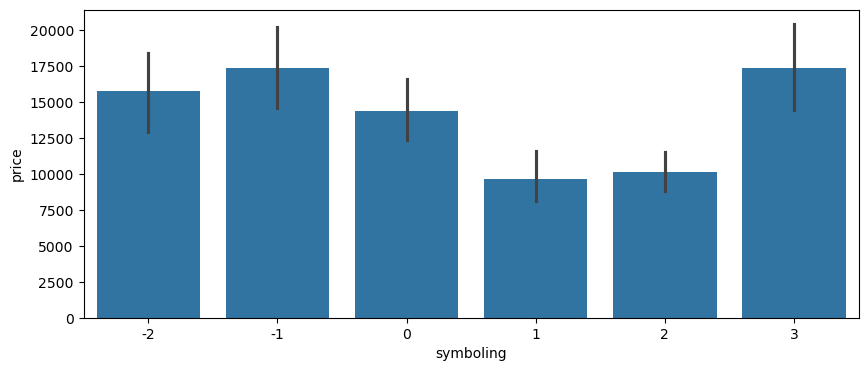

In [25]:
#EDA
#sns.scatterplot(x='price',y='symboling',data=data)
#sns.pairplot(data)
plt.figure(figsize=(10,4))
sns.barplot(x='symboling',y='price',data=data)
plt.show()

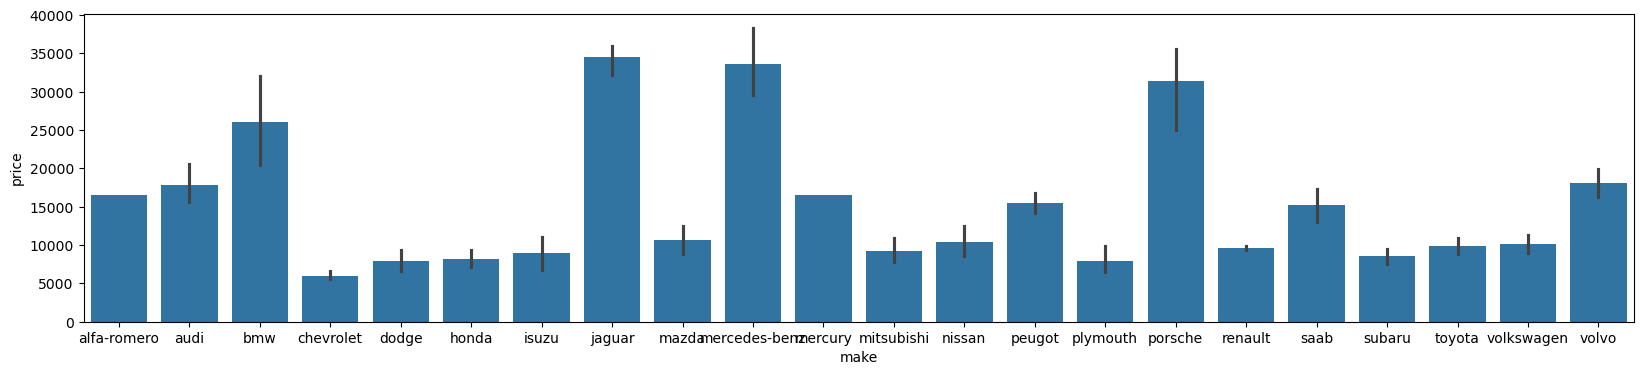

In [26]:
plt.figure(figsize=(20,4))
sns.barplot(x='make',y='price',data=data)
plt.show()

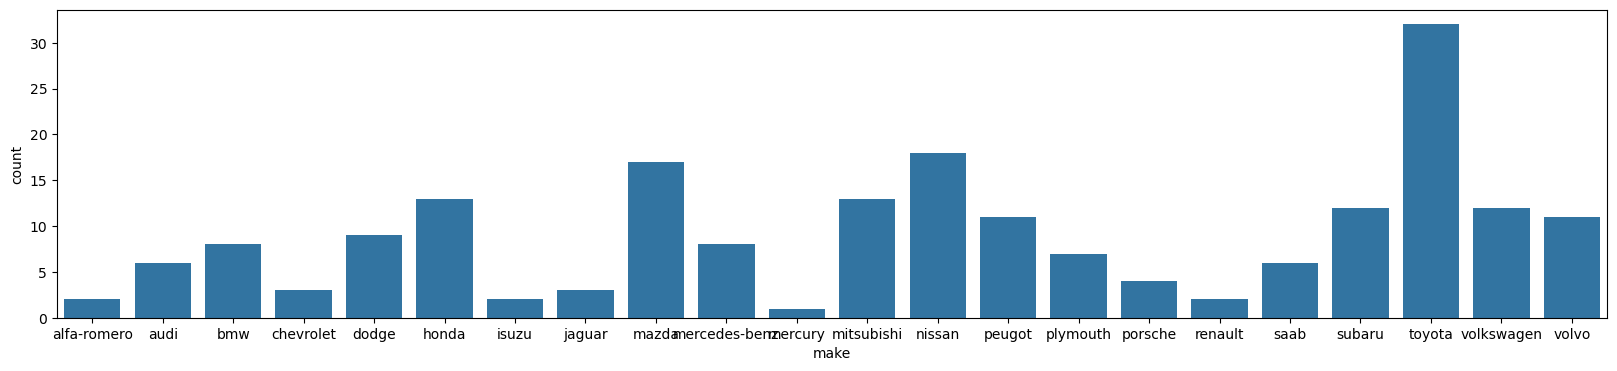

In [27]:
plt.figure(figsize=(20,4))
sns.countplot(x='make',data=data)
plt.show()

# High selling company is Toyota cars

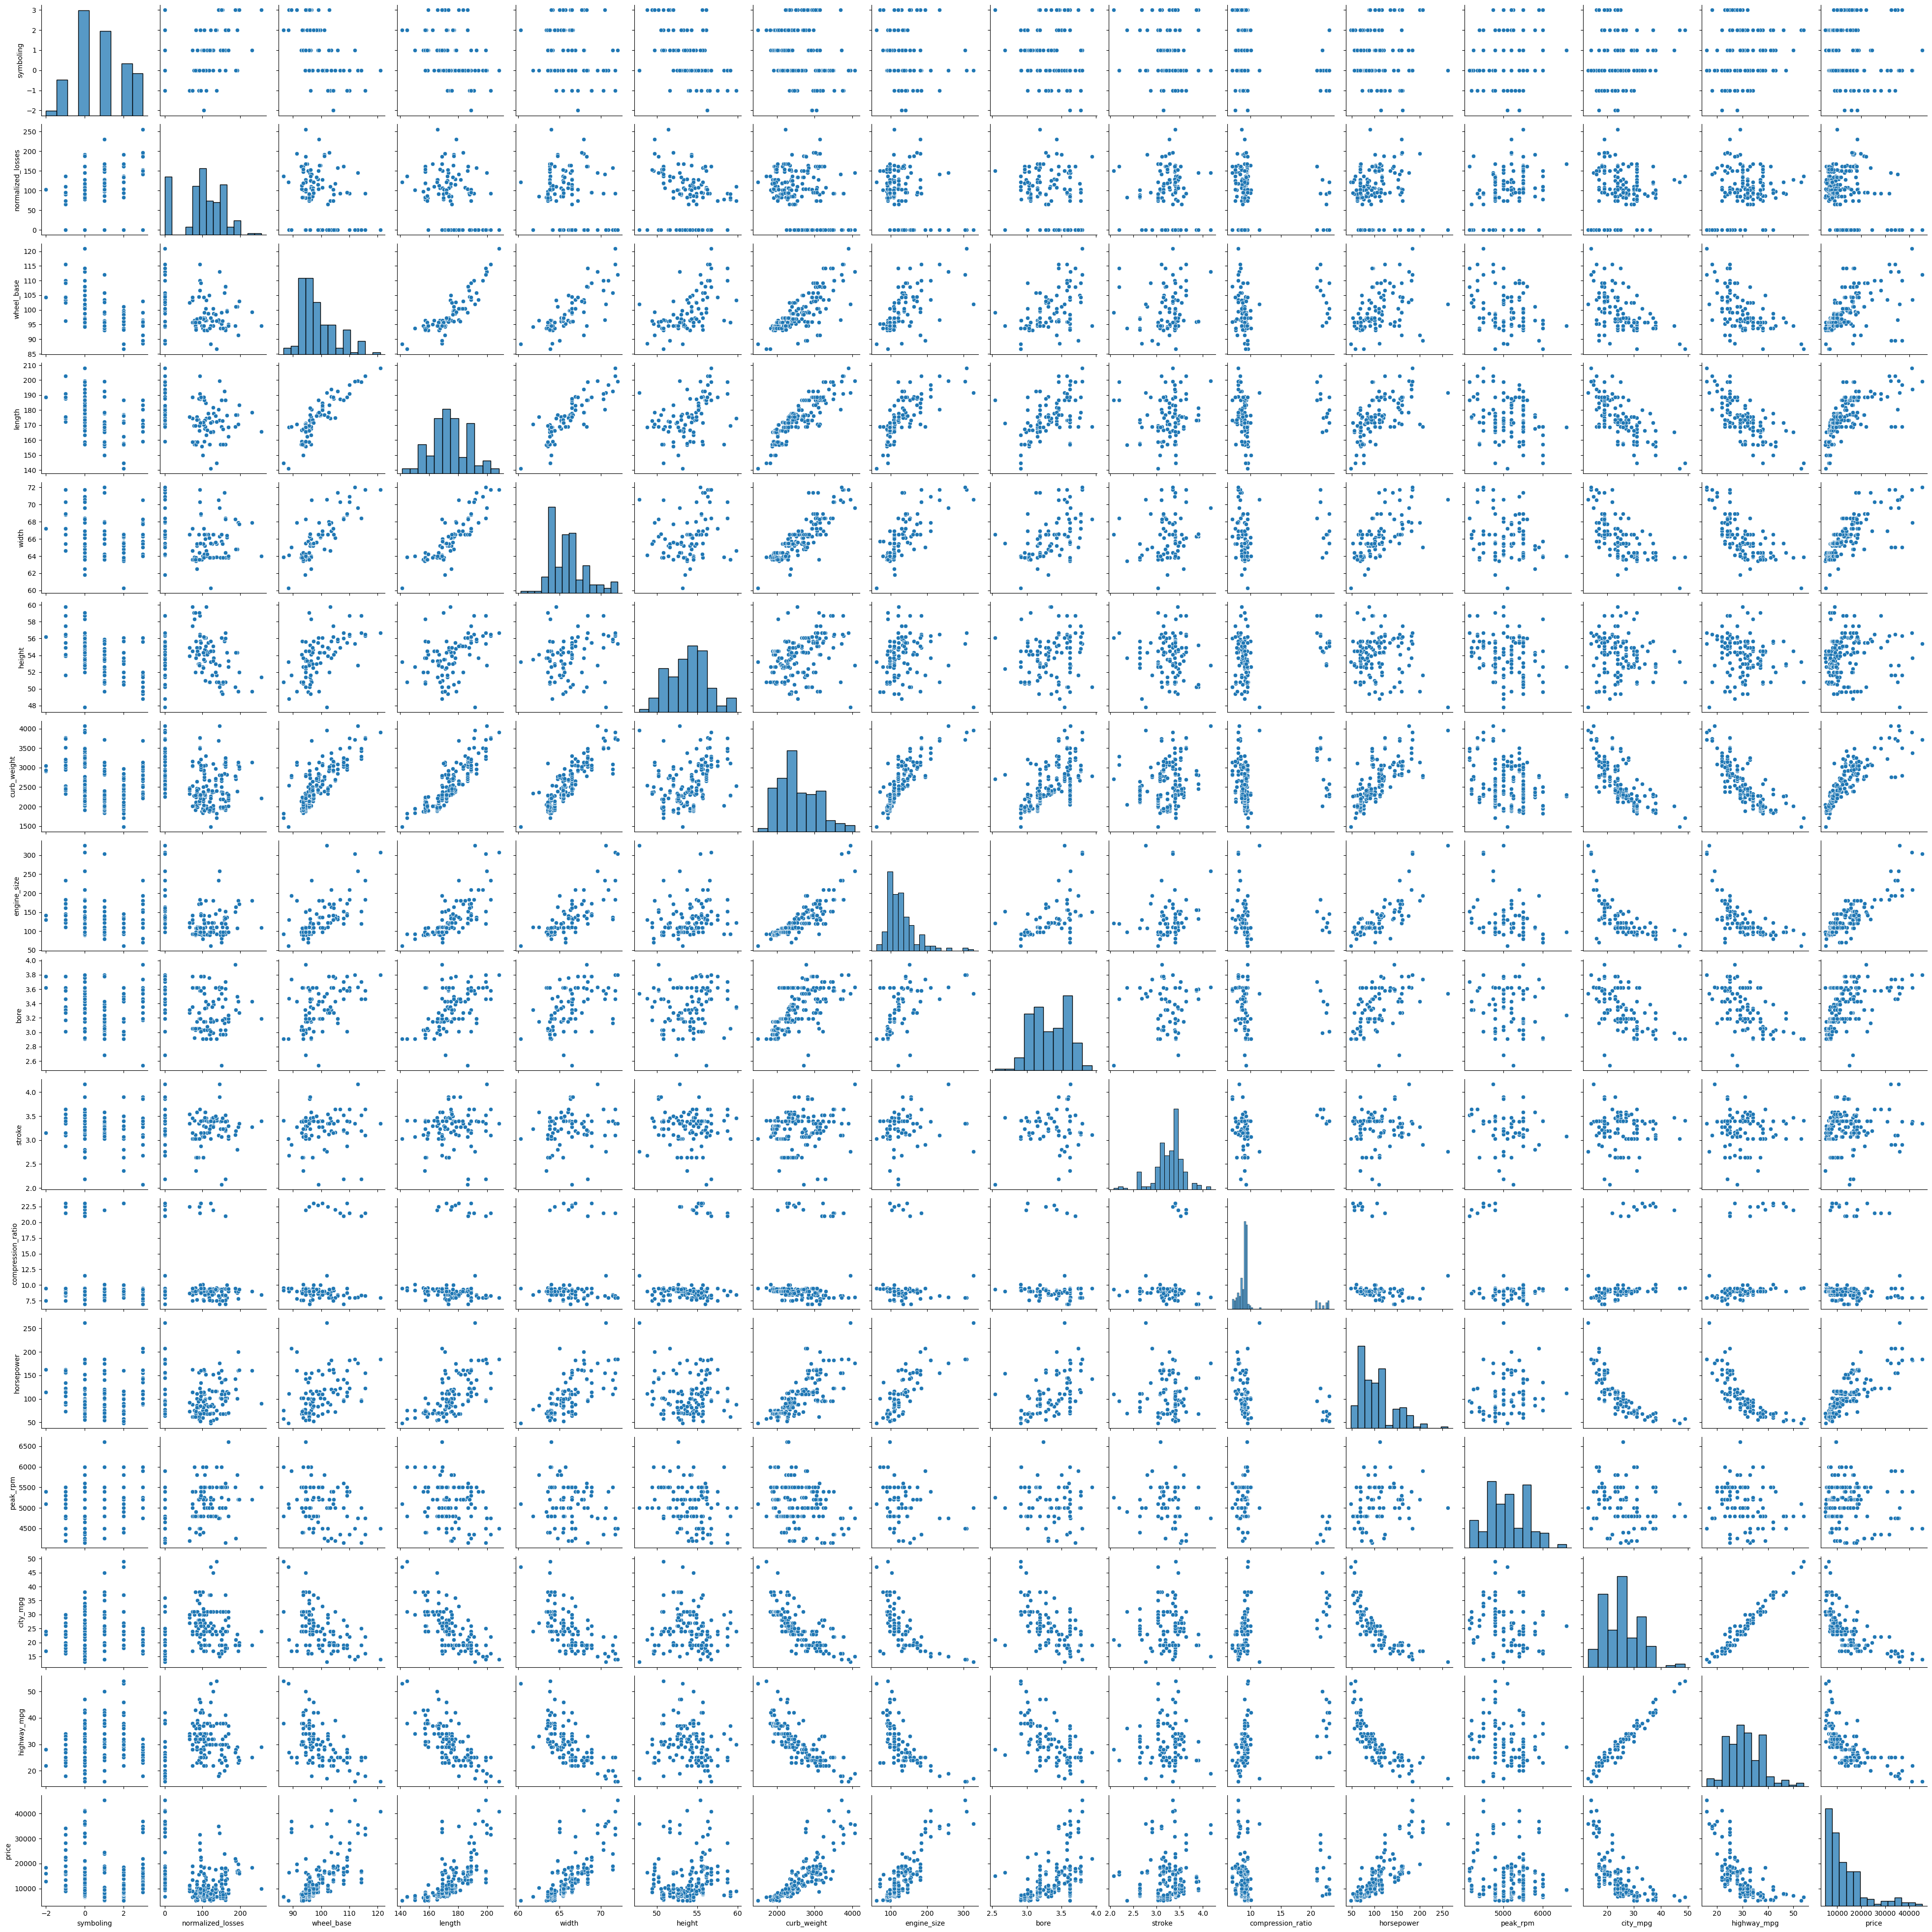

In [29]:
"""plt.figure(figsize=(25,25))
plotnumber=1

for column in data:
    plt.subplot(4,7,plotnumber)
    sns.barplot(x=data[column],y='price',data=data)
    plotnumber+=1
plt.tight_layout()"""
sns.pairplot(data)

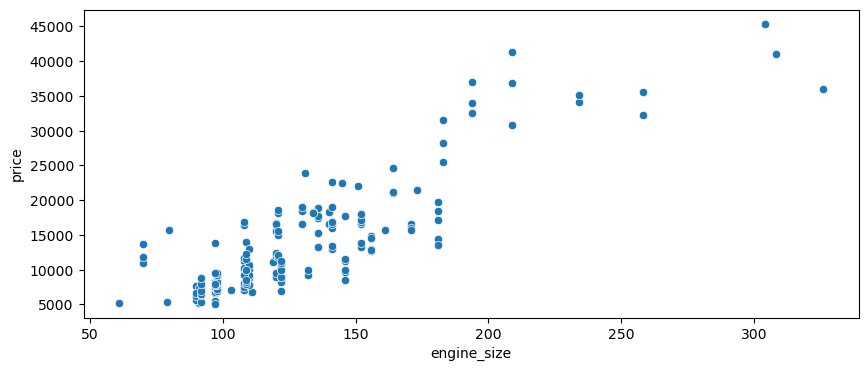

In [30]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='engine_size',y='price',data=data)
plt.show()

# There is a slight increase in the price with engine size.It shows a posituve relation between engine size and price

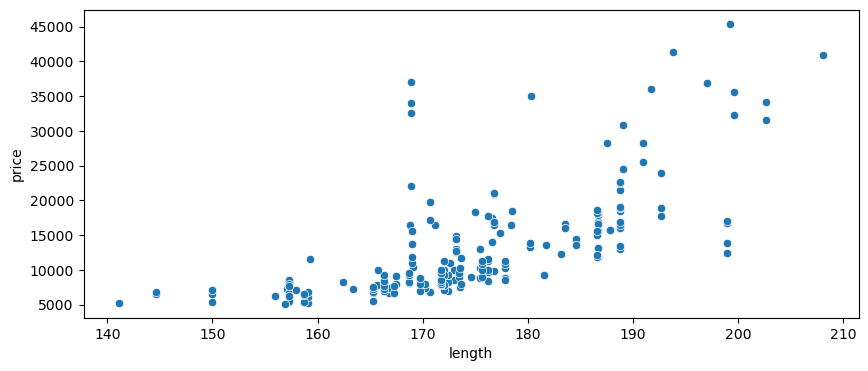

In [32]:
plt.figure(figsize=(10,4,))
sns.scatterplot(x='length',y='price',data=data)
plt.show()

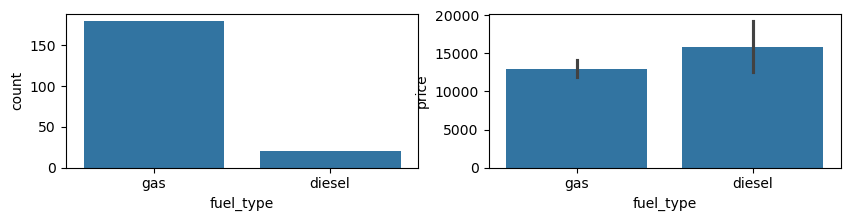

In [33]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
sns.countplot(x='fuel_type',data=data)
plt.subplot(1,2,2)
sns.barplot(x='fuel_type',y='price',data=data)
plt.show()

# Gas vehicles are selling more than diesel.One of the reason for this is gas vehicles are cheaper than diesel

<Axes: xlabel='curb_weight'>

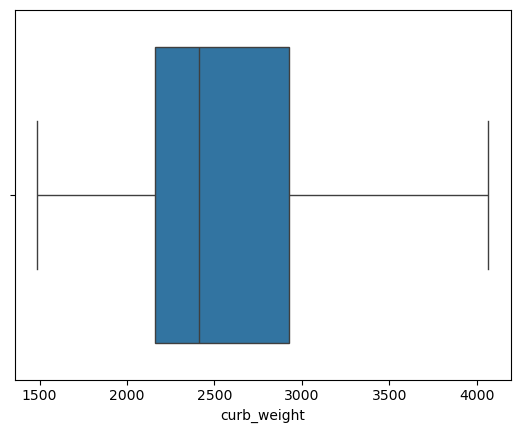

In [35]:
#Checking  Outliers
sns.boxplot(x='curb_weight',data=data)

<Axes: xlabel='engine_size'>

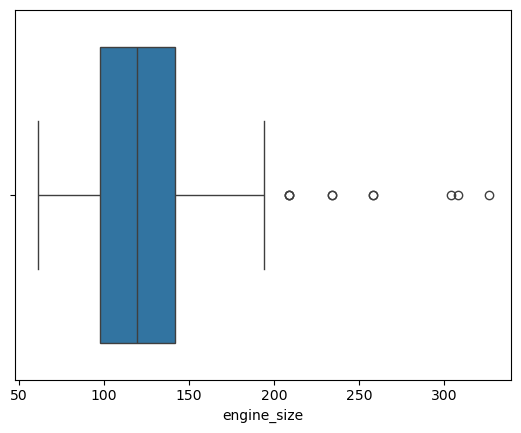

In [36]:
sns.boxplot(x='engine_size',data=data)

<Axes: xlabel='normalized_losses'>

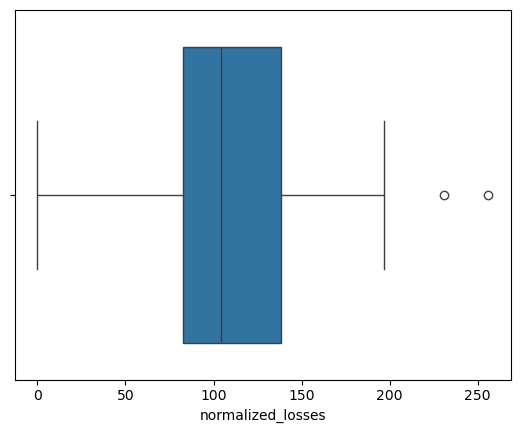

In [37]:
sns.boxplot(x='normalized_losses',data=data)

<Axes: xlabel='compression_ratio'>

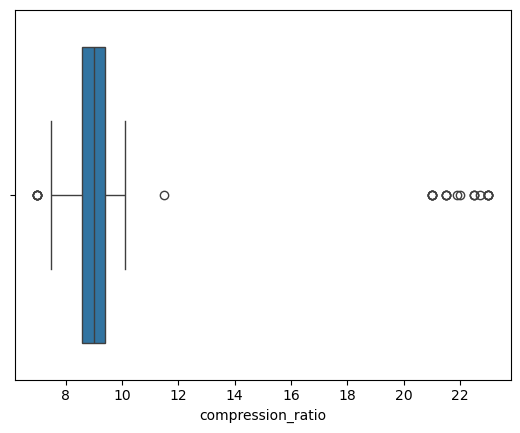

In [38]:
sns.boxplot(x='compression_ratio',data=data)

<Axes: xlabel='length'>

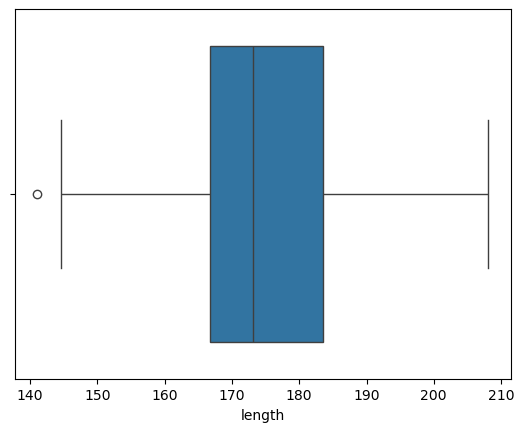

In [39]:
sns.boxplot(x='length',data=data)

<Axes: xlabel='width'>

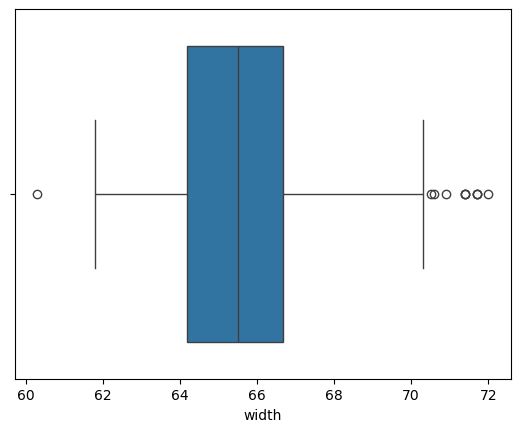

In [40]:
sns.boxplot(x='width',data=data)

<Axes: xlabel='city_mpg'>

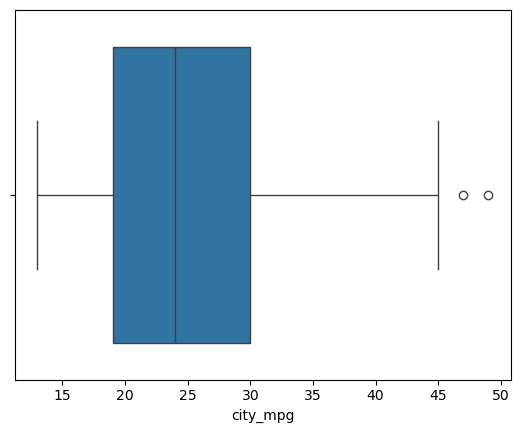

In [41]:
sns.boxplot(x='city_mpg',data=data)

<Axes: xlabel='highway_mpg'>

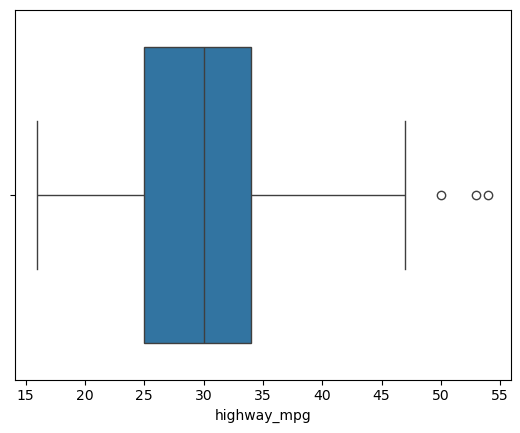

In [42]:
sns.boxplot(x='highway_mpg',data=data)

In [43]:
"""plt.figure(figsize=(30,25))

plot_number=1
for column in data:
    plt.subplot(4,7,plot_number)
    sns.boxplot(x=data[column],data=data)
    plot_number+=1
plt.tight_layout()"""

'plt.figure(figsize=(30,25))\n\nplot_number=1\nfor column in data:\n    plt.subplot(4,7,plot_number)\n    sns.boxplot(x=data[column],data=data)\n    plot_number+=1\nplt.tight_layout()'

<Axes: xlabel='engine_size', ylabel='Count'>

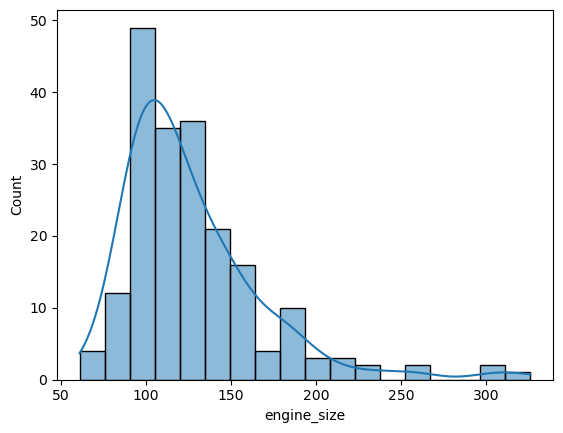

In [44]:
sns.histplot(x='engine_size',data=data,kde=True)

<Axes: xlabel='normalized_losses', ylabel='Count'>

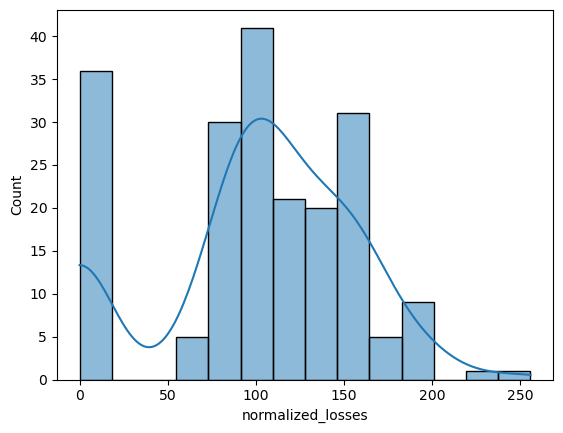

In [45]:
sns.histplot(x='normalized_losses',data=data,kde=True)

<Axes: xlabel='compression_ratio', ylabel='Count'>

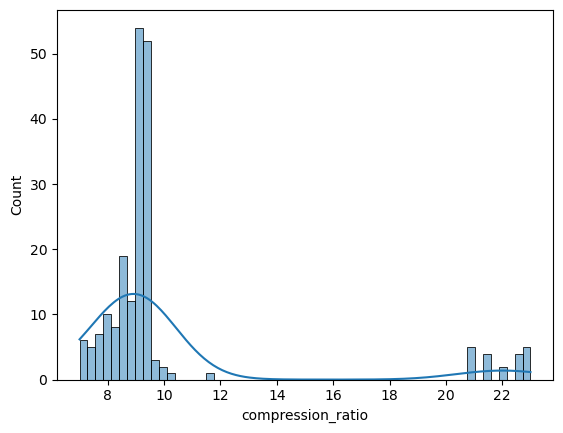

In [46]:
sns.histplot(x='compression_ratio',data=data,kde=True)

<Axes: xlabel='length', ylabel='Count'>

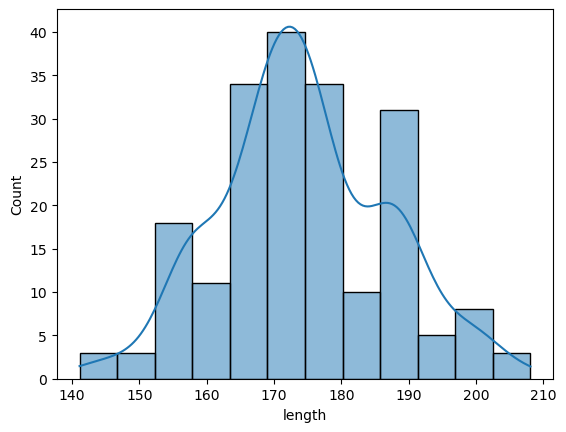

In [47]:
sns.histplot(x='length',data=data,kde=True)

<Axes: xlabel='width', ylabel='Count'>

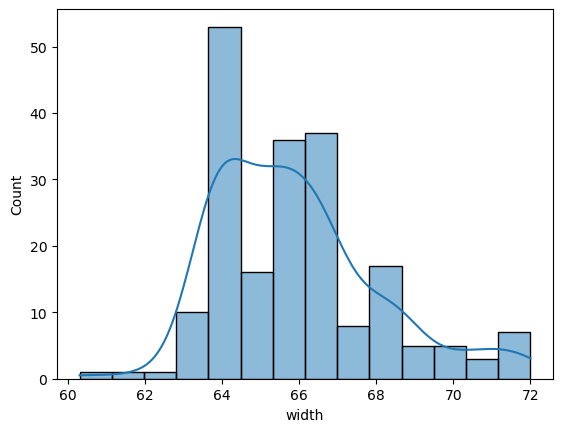

In [48]:
sns.histplot(x='width',data=data,kde=True)

<Axes: xlabel='city_mpg', ylabel='Count'>

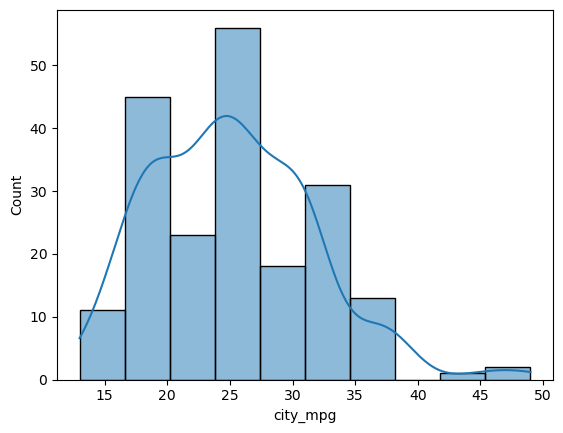

In [49]:
sns.histplot(x='city_mpg',data=data,kde=True)

<Axes: xlabel='highway_mpg', ylabel='Count'>

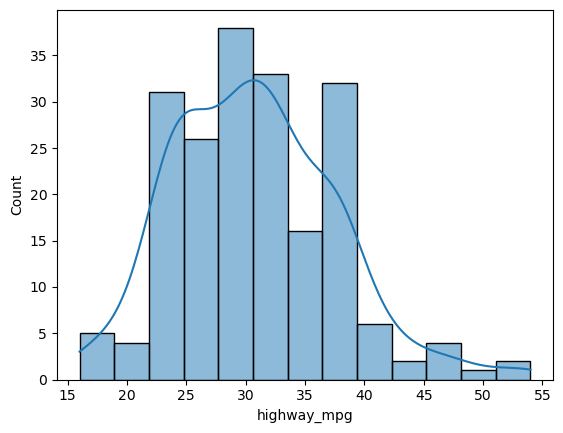

In [50]:
sns.histplot(x='highway_mpg',data=data,kde=True)

# Handling Outliers

In [52]:
data.loc[data['engine_size']>170,'engine_size']=np.mean(data['engine_size'])
#data.loc[data['normalized_losses']>200,'normalized_losses']=np.mean(data['normalized_losses'])
data.loc[data['compression_ratio']>9.8,'compression_ratio']=np.mean(data['compression_ratio'])
data.loc[data['compression_ratio']<8.6,'compression_ratio']=np.mean(data['compression_ratio'])
#data.loc[data['compression_ratio']>10.1,'compression_ratio']=np.mean(data['compression_ratio'])
data.loc[data['length']<154,'length']=np.mean(data['length'])
data.loc[data['length']>205,'length']=np.mean(data['length'])
data.loc[data['width']>69.8,'width']=np.mean(data['width'])
data.loc[data['width']<62.2,'width']=np.mean(data['width'])
data.loc[data['highway_mpg']>49,'highway_mpg']=np.mean(data['highway_mpg'])


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  200 non-null    int64  
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       200 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

In [54]:
#Checking the corelated columns
numerical_col=[]
for column in data.columns:
    if data[column].dtype=="int64":
        numerical_col.append(column)
    elif data[column].dtype=="float64":
        numerical_col.append(column)
print(numerical_col)

['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


In [55]:
numerical_col.remove('price')
print(numerical_col)

['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']


<Axes: >

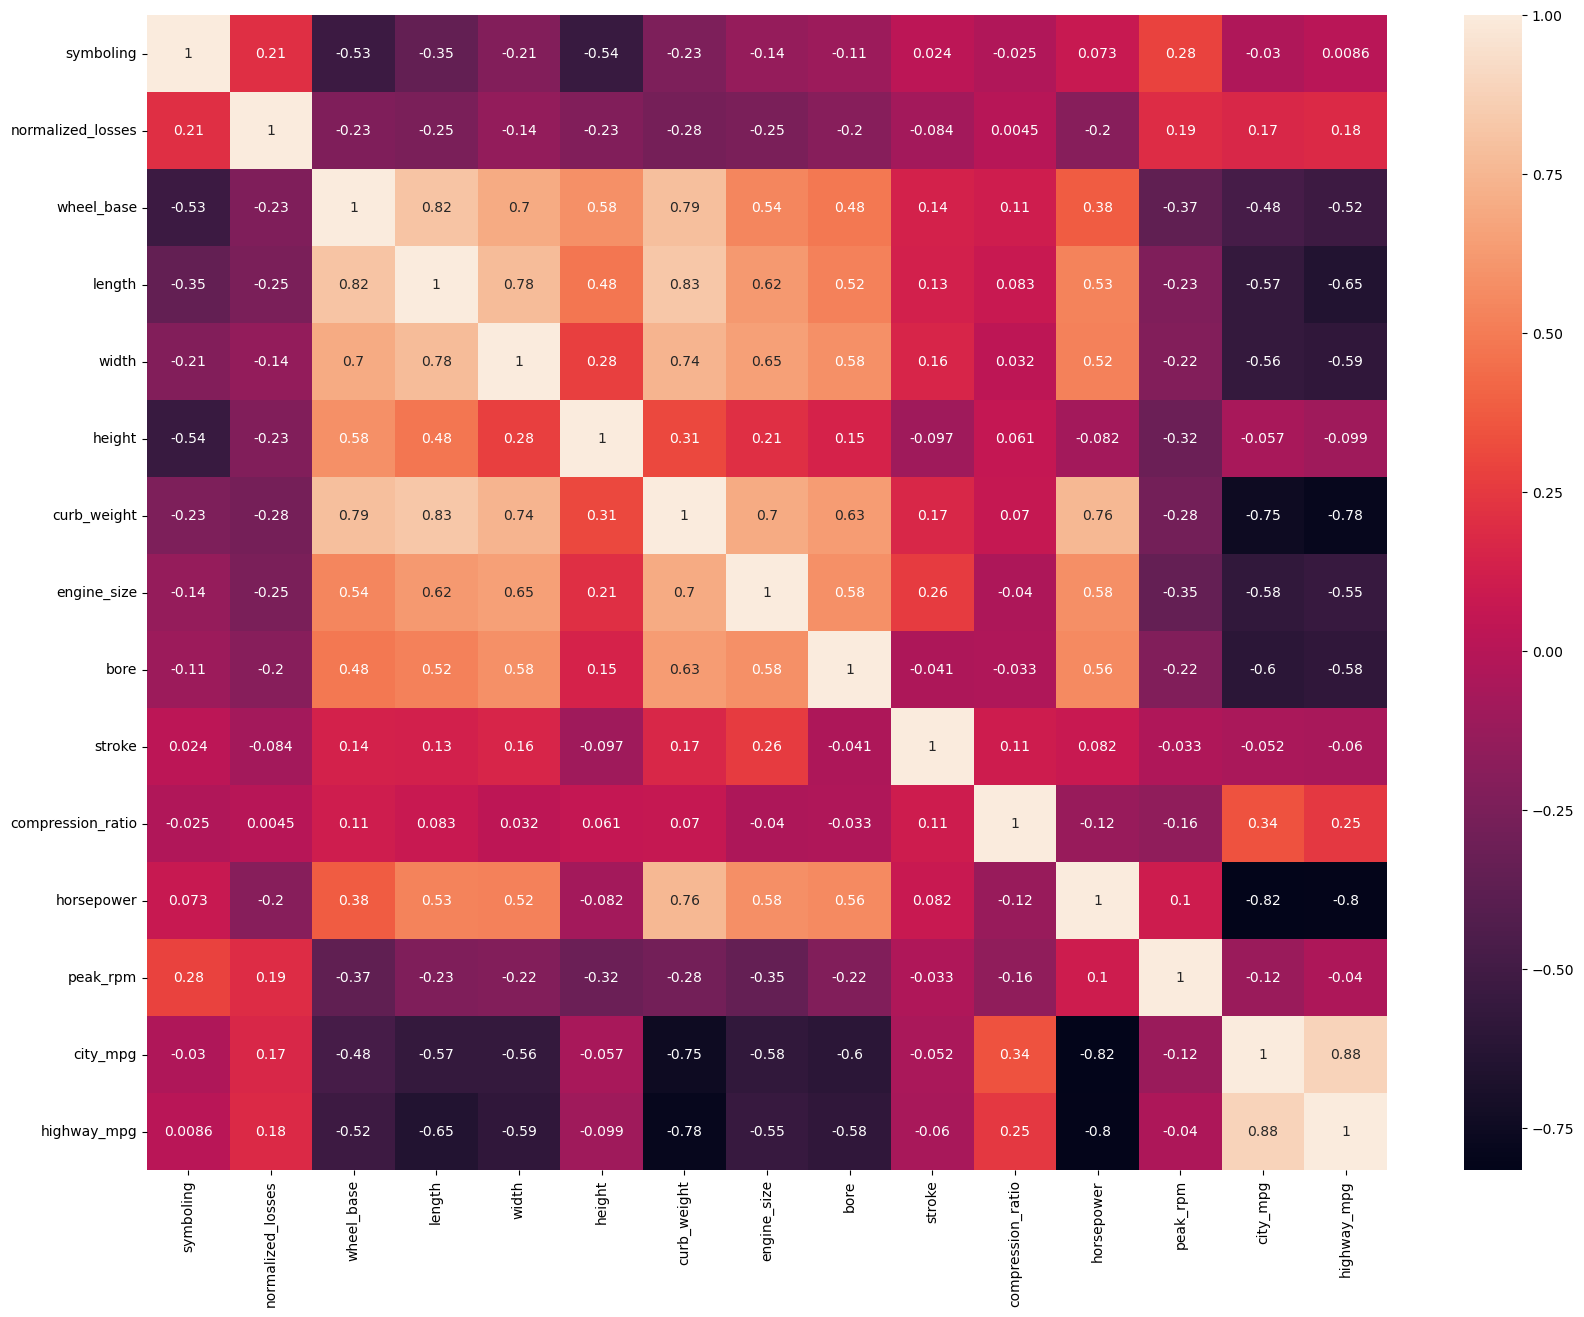

In [56]:
plt.figure(figsize=(20,15))
sns.heatmap(data[numerical_col].corr(),annot=True)

In [57]:
city_data=data['city_mpg'].values #storing city values

In [58]:
data.drop("city_mpg",axis=1,inplace=True) #city_mpg have high corelation

# Scaling and catagorical conversion

In [60]:
data.describe(include='O')

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
count,200,200,200,200,200,200,200,200,200,200
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,180,164,115,94,118,197,145,156,91


In [61]:
data['fuel_type'].unique()

array(['gas', 'diesel'], dtype=object)

In [62]:
data['num_of_doors'].value_counts()

num_of_doors
four    115
two      85
Name: count, dtype: int64

In [63]:
data['drive_wheels'].value_counts()

drive_wheels
fwd    118
rwd     74
4wd      8
Name: count, dtype: int64

In [64]:
data['engine_location'].value_counts()

engine_location
front    197
rear       3
Name: count, dtype: int64

In [65]:
data['aspiration'].value_counts()

aspiration
std      164
turbo     36
Name: count, dtype: int64

In [66]:
data['num_of_doors'].unique()

array(['two', 'four'], dtype=object)

In [67]:
data['normalized_losses'].mode()

0    0
Name: normalized_losses, dtype: int64

In [68]:
#replaceing missing values with mode of column [Object dtype]
"""data.loc[data['bore']=="?",'bore']="3.62"
data.loc[data['stroke']=="?",'stroke']="3.40"
data.loc[data['horsepower']=="?",'horsepower']="68"
data.loc[data['peak_rpm']=="?",'peak_rpm']="5500"
data.loc[data['num_of_doors']=="?",'num_of_doors']="four"
#data.loc[data['normalized_losses']==
#data.loc[data['num_of_doors']=="nan",'num_of_doors']="four"
data['num_of_doors'].fillna("four",inplace=True)"""

'data.loc[data[\'bore\']=="?",\'bore\']="3.62"\ndata.loc[data[\'stroke\']=="?",\'stroke\']="3.40"\ndata.loc[data[\'horsepower\']=="?",\'horsepower\']="68"\ndata.loc[data[\'peak_rpm\']=="?",\'peak_rpm\']="5500"\ndata.loc[data[\'num_of_doors\']=="?",\'num_of_doors\']="four"\n#data.loc[data[\'normalized_losses\']==\n#data.loc[data[\'num_of_doors\']=="nan",\'num_of_doors\']="four"\ndata[\'num_of_doors\'].fillna("four",inplace=True)'

In [69]:
data['symboling'].value_counts()

symboling
 0    65
 1    52
 2    32
 3    26
-1    22
-2     3
Name: count, dtype: int64

In [70]:
data['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [71]:
#transfering make data to a variable
company_data=data['make'].values
#company_data
#final_data=data.iloc[:

In [72]:
final_data=data.drop('make',axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  200 non-null    int64  
 2   fuel_type          200 non-null    object 
 3   aspiration         200 non-null    object 
 4   num_of_doors       200 non-null    object 
 5   body_style         200 non-null    object 
 6   drive_wheels       200 non-null    object 
 7   engine_location    200 non-null    object 
 8   wheel_base         200 non-null    float64
 9   length             200 non-null    float64
 10  width              200 non-null    float64
 11  height             200 non-null    float64
 12  curb_weight        200 non-null    int64  
 13  engine_type        200 non-null    object 
 14  num_of_cylinders   200 non-null    object 
 15  engine_size        200 non-null    float64
 16  fuel_system        200 non

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
    
transformer= ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[['four','two']]),["num_of_doors"]),
    ('tnf2',OrdinalEncoder(categories=[['4wd','fwd','rwd']]),["drive_wheels"]),
    ('tnf3',OrdinalEncoder(categories=[['front','rear']]),["engine_location"]),
    ('tnf4',OrdinalEncoder(categories=[['diesel','gas']]),["fuel_type"]),
    ('tnf5',OrdinalEncoder(categories=[['std','turbo']]),["aspiration"]),
    ('tnf6',OrdinalEncoder(categories=[['hardtop', 'wagon', 'sedan', 'hatchback', 'convertible']]),["body_style"]),
    ('tnf7',OrdinalEncoder(categories=[['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor']]),["engine_type"]),
    ('tnf8',OrdinalEncoder(categories=[['eight', 'five', 'four', 'six', 'three', 'twelve', 'two']]),["num_of_cylinders"]),
    ('tnf9',OrdinalEncoder(categories=[['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi']]),["fuel_system"]),

   
    
    ('tnf10',StandardScaler(),['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'compression_ratio','highway_mpg','bore','stroke','horsepower','peak_rpm'])
], remainder='passthrough')


In [74]:
new_df= transformer.fit_transform(final_data)
prepocessed_df=pd.DataFrame(new_df)

In [75]:
new_df.shape

(200, 24)

In [76]:
prepocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
 1   1       200 non-null    float64
 2   2       200 non-null    float64
 3   3       200 non-null    float64
 4   4       200 non-null    float64
 5   5       200 non-null    float64
 6   6       200 non-null    float64
 7   7       200 non-null    float64
 8   8       200 non-null    float64
 9   9       200 non-null    float64
 10  10      200 non-null    float64
 11  11      200 non-null    float64
 12  12      200 non-null    float64
 13  13      200 non-null    float64
 14  14      200 non-null    float64
 15  15      200 non-null    float64
 16  16      200 non-null    float64
 17  17      200 non-null    float64
 18  18      200 non-null    float64
 19  19      200 non-null    float64
 20  20      200 non-null    float64
 21  21      200 non-null    float64
 22  22

In [77]:
prepocessed_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1.0,2.0,0.0,1.0,0.0,4.0,0.0,2.0,5.0,1.742368,-1.762799,-1.701436,-0.550177,-0.993197,-2.060585,-0.014895,0.677700,-0.561839,-0.539856,0.495296,-1.855550,0.213047,-0.254406,16500.0
1,1.0,2.0,0.0,1.0,0.0,3.0,5.0,3.0,5.0,0.136499,-1.762799,-0.721882,-0.333291,-0.069583,-0.574437,0.516715,1.728480,-0.561839,-0.699549,-2.420382,0.660342,1.358889,-0.254406,16500.0
2,0.0,1.0,0.0,1.0,0.0,2.0,3.0,2.0,5.0,0.939433,1.127035,0.158057,0.154702,0.392223,0.209918,-0.422785,-0.325317,2.277751,-0.060775,-0.538109,0.437415,-0.026781,0.788243,13950.0
3,0.0,0.0,0.0,1.0,0.0,2.0,3.0,1.0,5.0,0.939433,1.127035,0.091646,0.154702,0.524168,0.209918,0.518648,0.964276,-0.605492,-1.338323,-0.538109,0.437415,0.319637,0.788243,17450.0
4,1.0,1.0,0.0,1.0,0.0,2.0,3.0,1.0,5.0,0.939433,-1.762799,0.158057,0.217961,0.458195,-0.285464,-0.094153,0.964276,-0.605492,-0.859243,-0.538109,0.437415,0.186399,0.788243,15250.0


# Model Creation

In [79]:
#x=final_data.drop('price',axis=1)
#y=final_data.price
x=prepocessed_df.iloc[:,:23]
y=prepocessed_df.iloc[:,23]

In [80]:
x.shape

(200, 23)

In [81]:
y.shape

(200,)

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
y_test.shape

(40,)

In [84]:
#Model Building
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [85]:
y_pred=model.predict(x_test)

In [86]:
from sklearn.metrics import mean_squared_error,r2_score,adjusted_rand_score
mean_squared_error(y_test,y_pred)

7465086.753494991

In [87]:
r2_score(y_test,y_pred)

0.9333761143948849

In [88]:
#1-(1-R2)*(n-1)/(n-k-1)
adj_r2=1-(1-0.93)*(40-1)/(40-23-1)
adj_r2

0.8293750000000001

# The model able to predict in accuracy of 83%